In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Train and Validation Data

# Load the train data
train_url = "https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv"
train_df = pd.read_csv(train_url)

# Load the validation data
val_url = "https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Val.csv"
val_df = pd.read_csv(val_url)

# Load the test data
test_url = "https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/english_test_with_labels.csv"
test_df = pd.read_csv(test_url)

In [ ]:
# View Train Data
train_df.head()

id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


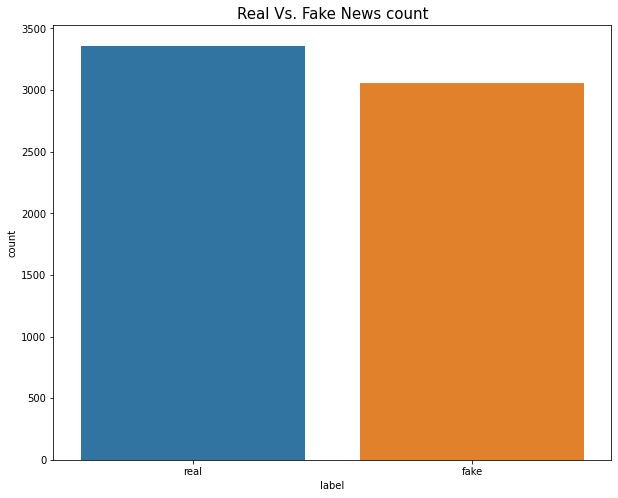

In [ ]:
# Evaluate whether the data is balanced or not
plt.figure(figsize = (10,8))
sns.countplot(train_df['label'])
plt.title("Real Vs. Fake News count", fontsize = 15)
plt.show()

In [ ]:
# Upsample Fake News to Balance the Dataset
from sklearn.utils import resample

df_majority = train_df[train_df.label =='real']
df_minority = train_df[train_df.label == 'fake']

negative_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = 101)

df_upsampled = pd.concat([df_majority, negative_upsample])
df_upsampled

id                                              tweet label
0        1  The CDC currently reports 99031 deaths. In gen...  real
1        2  States reported 1121 deaths a small rise from ...  real
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4        5  Populous states can generate large case counts...  real
5        6  Covid Act Now found "on average each person in...  real
...    ...                                                ...   ...
3701  3702  Trudeau airs a coronavirus update rerun, to se...  fake
2486  2487  Trumps nude statue is made in New York city be...  fake
5469  5470  Says Russia unleashed more than 500 lions on i...  fake
1982  1983  Hospital in Pakistan is overwhelmed by COVID-1...  fake
5285  5286  Bill Gates is plotting to use COVID-19 testing...  fake

[6720 rows x 3 columns]

In [ ]:
## Validating that dataset is balanced after upsampling
print("Real News Dataset Size: " + str(df_majority.shape))
print("Fake News Dataset Size Before Upsampling: " + str(df_minority.shape))
print("Fake News Dataset Size After Upsampling: " + str(negative_upsample.shape))

Real News Dataset Size: (3360, 3)
Fake News Dataset Size Before Upsampling: (3060, 3)
Fake News Dataset Size After Upsampling: (3360, 3)


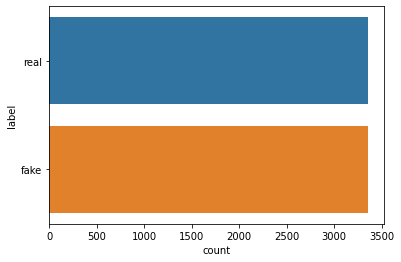

In [ ]:
sns.countplot(y="label", data = df_upsampled);

In [ ]:
## Check if validation set size
len(val_df)

2140

In [ ]:
## Split train and test, drop id column, and binarize target
x_train = df_upsampled
x_val = val_df
x_test = test_df
y_train = df_upsampled[['label']].to_numpy()
y_val = val_df[['label']].to_numpy()
y_test = test_df[['label']].to_numpy()
from sklearn import preprocessing
y_train= preprocessing.label_binarize(y_train, classes =['real', 'fake'])
y_val = preprocessing.label_binarize(y_val, classes=['real', 'fake'])
y_test = preprocessing.label_binarize(y_test, classes=['real', 'fake'])

In [ ]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

## Preprocessing Methods

In [ ]:
# Download stopwords and its dependencies for preprocessing
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
wn = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pip install cleantext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Pre-Processed News Dataset 1
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. lemmatize words

from string import punctuation

def lemmatize_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Lemmatize words
    lemmatized_words = [wn.lemmatize(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in lemmatized_words)
    
    return cleaned_news_excerpt

In [ ]:
# Pre-Processed News Dataset 2
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. stem words

def stemmed_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Stem words
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in stemmed_words)
    
    return cleaned_news_excerpt

In [ ]:
# Pre-Processed News Dataset 3
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation

def preprocess_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in words)
    
    return cleaned_news_excerpt

In [ ]:
import nltk
nltk.download('omw-1.4')
x_train["lemmatized_tweet"] = x_train["tweet"].apply(lemmatize_preprocessed_news)
x_train["stemmed_tweet"] = x_train["tweet"].apply(stemmed_preprocessed_news)
x_train["cleaned_tweet"] = x_train["tweet"].apply(preprocess_news)
x_train["lemmatized_tokens"] = x_train["lemmatized_tweet"].str.split(" ")
x_train["stemmed_tokens"] = x_train["stemmed_tweet"].str.split(" ")
x_val["lemmatized_tweet"] = x_val["tweet"].apply(lemmatize_preprocessed_news)
x_val["stemmed_tweet"] = x_val["tweet"].apply(stemmed_preprocessed_news)
x_val["lemmatized_tokens"] = x_val["lemmatized_tweet"].str.split(" ")
x_val["stemmed_tokens"] = x_val["stemmed_tweet"].str.split(" ")
x_test["lemmatized_tweet"] = x_val["tweet"].apply(lemmatize_preprocessed_news)
x_test["stemmed_tweet"] = x_val["tweet"].apply(stemmed_preprocessed_news)
x_test["lemmatized_tokens"] = x_test["lemmatized_tweet"].str.split(" ")
x_test["stemmed_tokens"] = x_test["stemmed_tweet"].str.split(" ")
x_train.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


id                                              tweet label  \
0   1  The CDC currently reports 99031 deaths. In gen...  real   
1   2  States reported 1121 deaths a small rise from ...  real   
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real   
4   5  Populous states can generate large case counts...  real   
5   6  Covid Act Now found "on average each person in...  real   

                                    lemmatized_tweet  \
0  cdc currently report 99031 death general discr...   
1  state reported 1121 death small rise last tues...   
3  indiafightscorona 1524 covid testing laborator...   
4  populous state generate large case count look ...   
5  covid act found on average person illinois cov...   

                                       stemmed_tweet  \
0  cdc current report 99031 death gener discrep d...   
1  state report 1121 death small rise last tuesda...   
3  indiafightscorona 1524 covid test laboratori i...   
4  popul state gener larg case count look new cas...   
5  covid act found on averag person illinoi covid...   

                                       cleaned_tweet  \
0  cdc currently reports 99031 deaths general dis...   
1  states reported 1121 deaths small rise last tu...   
3  indiafightscorona 1524 covid testing laborator...   
4  populous states generate large case counts loo...   
5  covid act found on average person illinois cov...   

                                   lemmatized_tokens  \
0  [cdc, currently, report, 99031, death, general...   
1  [state, reported, 1121, death, small, rise, la...   
3  [indiafightscorona, 1524, covid, testing, labo...   
4  [populous, state, generate, large, case, count...   
5  [covid, act, found, on, average, person, illin...   

                                      stemmed_tokens  
0  [cdc, current, report, 99031, death, gener, di...  
1  [state, report, 1121, death, small, rise, last...  
3  [indiafightscorona, 1524, covid, test, laborat...  
4  [popul, state, gener, larg, case, count, look,...  
5  [covid, act, found, on, averag, person, illino...

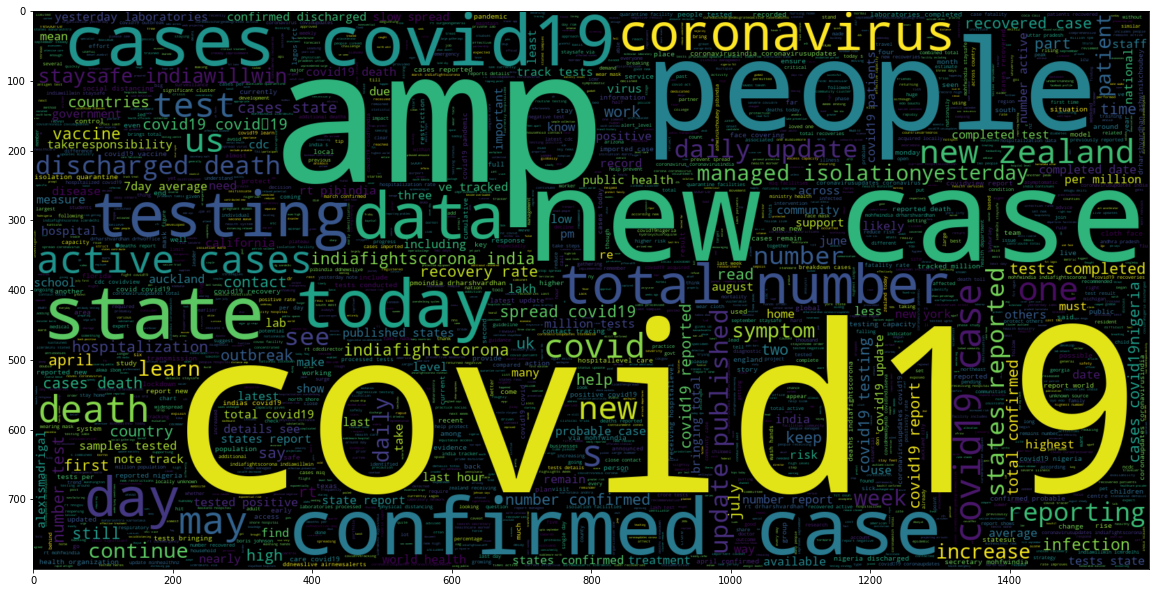

In [ ]:
## Conduct EDA and build wordclouds to see the most frequent words that occur in real vs fake tweets 
## using preprocessed reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(x_train[x_train.label == 'real'].cleaned_tweet))
plt.imshow(wc, interpolation = 'bilinear')

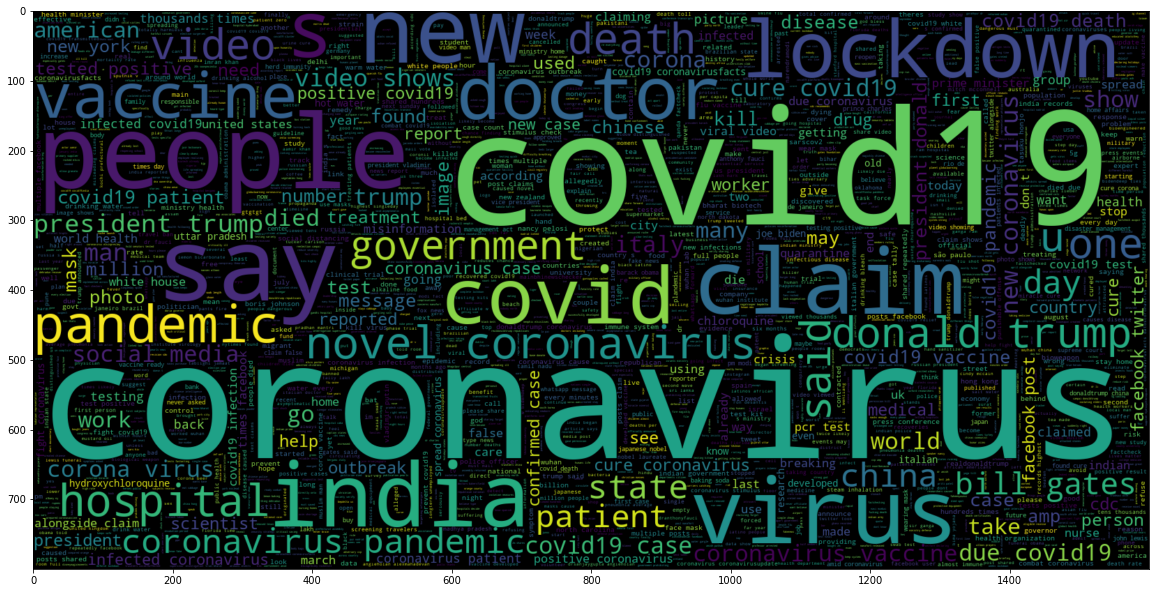

In [ ]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(x_train[x_train.label == 'fake'].cleaned_tweet))
plt.imshow(wc, interpolation = 'bilinear')

The above wordclouds suggest identifying fake vs real news will be a difficult task as the words that commonly apperar in real and fake news are the same. Key differentiators of fake news appear to be words such as "claim", "said", and "say."

In [ ]:
## Create Bag of Words preprocessed datasets
from sklearn.feature_extraction.text import CountVectorizer

corpus1 = x_train['tweet'].values.tolist()
corpus2 = x_train['tweet'].values.tolist()
corpus1_val = x_val['tweet'].values.tolist()
corpus2_val = x_val['tweet'].values.tolist()
corpus1_test = x_test['tweet'].values.tolist()
corpus2_test = x_test['tweet'].values.tolist()

# Lemmatized One-hot Encoding
vectorizer = CountVectorizer(binary = True, preprocessor= lemmatize_preprocessed_news)
x_lemmatized_ohe = vectorizer.fit_transform(corpus1).toarray()
x_lemmatized_ohe_val = vectorizer.transform(corpus1_val).toarray()
x_lemmatized_ohe_test = vectorizer.transform(corpus1_test).toarray()

# Stemmed One-hot Encoding
x_stemmed_ohe = vectorizer.fit_transform(corpus2).toarray()
x_stemmed_ohe_val = vectorizer.transform(corpus2_val).toarray()
x_stemmed_ohe_test = vectorizer.transform(corpus2_test).toarray()

# Lemmatized Bag of Words
vectorizer = CountVectorizer(preprocessor= lemmatize_preprocessed_news)
x_lemmatized_bow = vectorizer.fit_transform(corpus1).toarray()
x_lemmatized_bow_val = vectorizer.transform(corpus1_val).toarray()
x_lemmatized_bow_test = vectorizer.transform(corpus1_test).toarray()

# Stemmed Bag of Words
vectorizer = CountVectorizer(preprocessor=stemmed_preprocessed_news)
x_stemmed_bow = vectorizer.fit_transform(corpus2).toarray()
x_stemmed_bow_val = vectorizer.transform(corpus2_val).toarray()
x_stemmed_bow_test = vectorizer.transform(corpus2_test).toarray()


In [ ]:
## Create TFIDF preprocessed datasets
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = lemmatize_preprocessed_news)
x_lemmatized_tfidf = vectorizer.fit_transform(corpus1).toarray()
x_lemmatized_tfidf_val = vectorizer.transform(corpus1_val).toarray()
x_lemmatized_tfidf_test = vectorizer.transform(corpus1_test).toarray()
vectorizer = TfidfVectorizer(preprocessor=stemmed_preprocessed_news)
x_stemmed_tfidf = vectorizer.fit_transform(corpus2).toarray()
x_stemmed_tfidf_val = vectorizer.transform(corpus2_val).toarray()
x_stemmed_tfidf_test = vectorizer.transform(corpus2_test).toarray()

In [ ]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 71.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
def create_w2vec_vectors(model, train, test, val):
  words = set(model.wv.index_to_key)
  x_train = np.array([np.array([model.wv[i] for i in ls if i in words]) for ls in train])
  x_val = np.array([np.array([model.wv[i] for i in ls if i in words]) for ls in val])
  x_test = np.array([np.array([model.wv[i] for i in ls if i in words]) for ls in test])

  x_train_avg = []
  for i in x_train:
    if i.size:
      x_train_avg.append(i.mean(axis=0))
    else:
        x_train_avg.append(np.zeros(100, dtype=float))

  x_val_avg = []
  for i in x_val:
    if i.size:
      x_val_avg.append(i.mean(axis=0))
    else:
        x_val_avg.append(np.zeros(100, dtype=float))

  x_test_avg = []
  for i in x_test:
    if i.size:
        x_test_avg.append(i.mean(axis=0))
    else:
        x_test_avg.append(np.zeros(100, dtype=float))
  return x_train_avg, x_val_avg, x_test_avg


In [ ]:
## Create Word2Vec vectors
import itertools
import gensim
from gensim.models import Word2Vec
lemmatized_tokns = list(x_train['lemmatized_tokens'])
lemmatized_token_list = list(itertools.chain(*lemmatized_tokns))

CBOW = gensim.models.Word2Vec([lemmatized_token_list], window =5, min_count=1, workers = 4)
SG = gensim.models.Word2Vec([lemmatized_token_list], window =5, min_count=1, workers = 4, sg=1)

#x_train['lemmatized_tokens'].values

#lemmatized_train_CBOW, lemmatized_val_CBOW, lemmatized_test_CBOW = 
lemmatized_train_CBOW, lemmatized_val_CBOW, lemmatized_test_CBOW = create_w2vec_vectors(CBOW, x_train['lemmatized_tokens'].values, x_val['lemmatized_tokens'].values, x_test['lemmatized_tokens'].values)

lemmatized_train_SG, lemmatized_val_SG, lemmatized_test_SG = create_w2vec_vectors(SG, x_train["lemmatized_tokens"].values, x_val["lemmatized_tokens"].values, x_test["lemmatized_tokens"].values)



stemmed_tokens = list(x_train['stemmed_tokens'])
stemmed_token_list = list(itertools.chain(*stemmed_tokens))
CBOW = gensim.models.Word2Vec([stemmed_token_list], window =5, min_count=1, workers = 4)
SG = gensim.models.Word2Vec([stemmed_token_list], window =5, min_count=1, workers = 4, sg=1)

stemmed_train_CBOW, stemmed_val_CBOW, stemmed_test_CBOW = create_w2vec_vectors(CBOW, x_train["stemmed_tokens"].values, x_val["stemmed_tokens"].values, x_test["stemmed_tokens"].values)

stemmed_train_SG, stemmed_val_SG, stemmed_test_SG = create_w2vec_vectors(SG, x_train["stemmed_tokens"].values, x_val["stemmed_tokens"].values, x_test["stemmed_tokens"].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
def plot_confusion_matrix(y_true, y_pred):
  cf_matrix = confusion_matrix(y_true, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
  return

In [ ]:
#plot precision recall score
from sklearn.metrics import precision_recall_curve
def plot_precision_recall(y_test, y_score):
  precision, recall, thresholds = precision_recall_curve(y_test, y_score)
  fig, ax = plt.subplots()
  ax.plot(recall, precision, color='purple')
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')
  plt.show()

## Random Forest Classifier

In [ ]:
## Use Randomized Search to train Random Forest for best parameters on a validation set
from sklearn.model_selection import RandomizedSearchCV
def tune_rf(x_train, y_train):
  n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
  max_features = ['auto', 'sqrt']
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  min_samples_split = [2, 5, 10]
  min_samples_leaf = [1, 2, 4]
  bootstrap = [True, False]
  random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
  rf = RandomForestClassifier()
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=4, random_state=42, n_jobs = -1)
  rf_random.fit(x_train, y_train.ravel())
  return rf_random.best_params_

In [ ]:
# Obtain best parameters using lemmatized bag of words
best_params = tune_rf(x_lemmatized_bow, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print(best_params)

{'n_estimators': 944, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}


In [ ]:
# Function for running tuned random forest and obtaining evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
def build_random_forest(x_train, y_train, x_val, y_val):
  clf = RandomForestClassifier(n_estimators = 944, min_samples_split=2, min_samples_leaf =1, max_features = 'auto', max_depth=50, bootstrap=False)
  clf.fit(x_train, y_train.ravel())
  y_pred = clf.predict(x_val)
  print(classification_report(y_pred,y_val))
  plot_confusion_matrix(y_val, y_pred)
  RocCurveDisplay.from_estimator(clf, x_val, y_val)
  y_score = clf.predict_proba(x_val)[:, 1]
  plot_precision_recall(y_val, y_score)
  #print(best_params)

## Random Forest on One Hot Encoded Vectors

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1060
           1       0.91      0.86      0.89      1080

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140



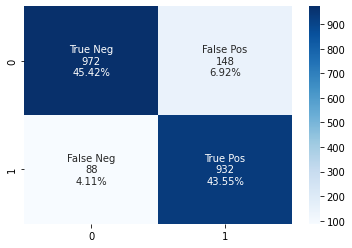

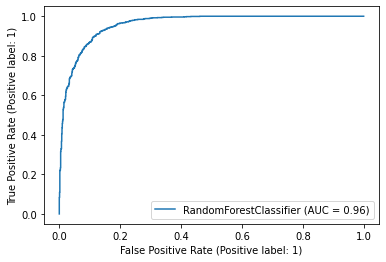

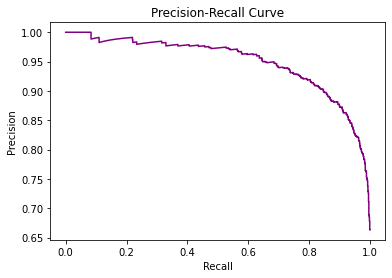

In [ ]:
build_random_forest(x_lemmatized_ohe, y_train, x_lemmatized_ohe_val, y_val)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1060
           1       0.92      0.87      0.90      1080

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140



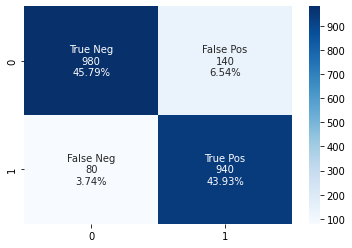

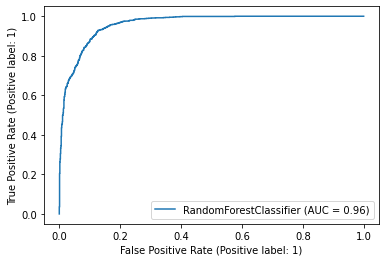

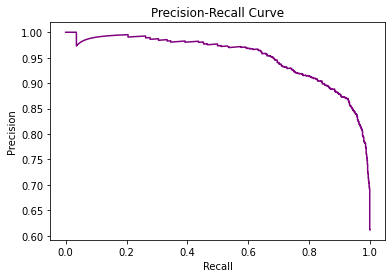

In [ ]:
build_random_forest(x_lemmatized_ohe, y_train, x_lemmatized_ohe_test, y_test)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1064
           1       0.91      0.86      0.89      1076

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140



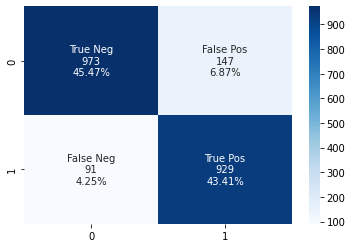

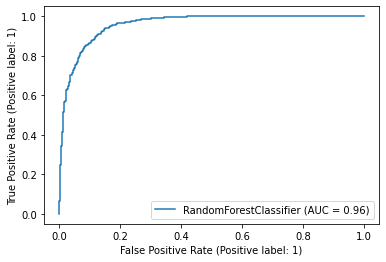

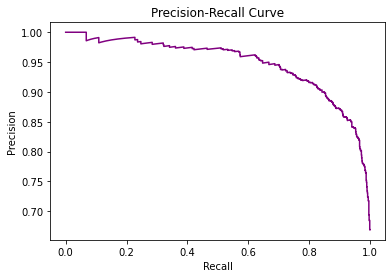

In [ ]:
build_random_forest(x_stemmed_ohe, y_train, x_stemmed_ohe_val, y_val)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1062
           1       0.92      0.87      0.90      1078

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140



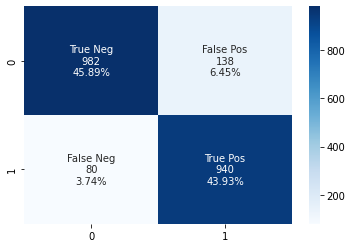

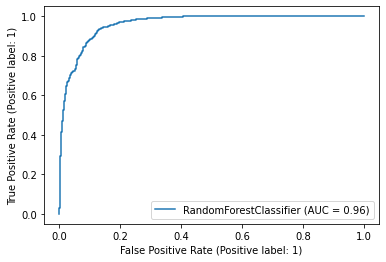

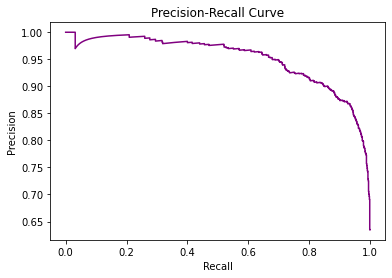

In [ ]:
build_random_forest(x_stemmed_ohe, y_train, x_stemmed_ohe_test, y_test)

## Random Forest with Bag of Words

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1061
           1       0.91      0.86      0.89      1079

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140



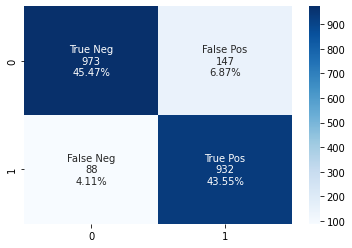

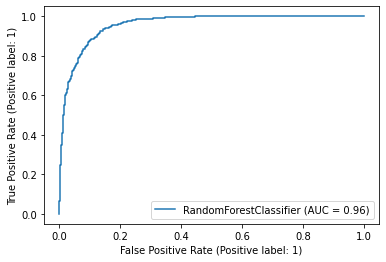

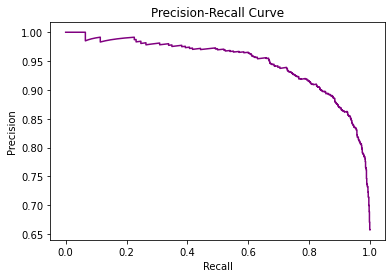

In [ ]:
## Create Random Forest Model with Lemmatized Bag of Words
build_random_forest(x_lemmatized_bow, y_train, x_lemmatized_bow_val, y_val)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1054
           1       0.93      0.87      0.90      1086

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140



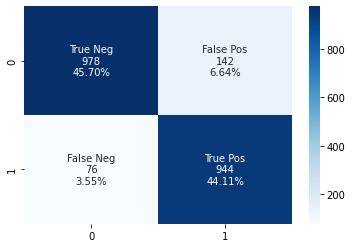

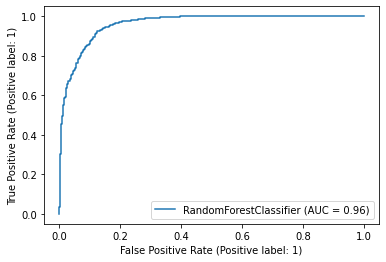

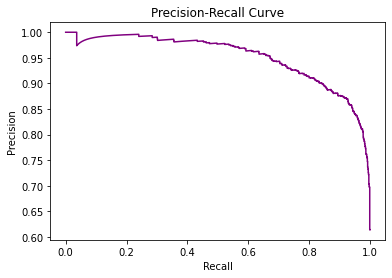

In [ ]:
## Create Random Forest Model with Lemmatized Bag of Words
build_random_forest(x_lemmatized_bow, y_train, x_lemmatized_bow_test, y_test)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1065
           1       0.91      0.86      0.88      1075

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140



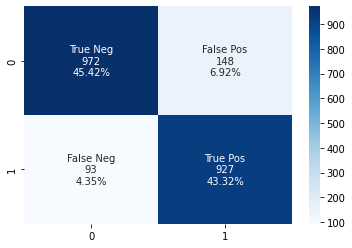

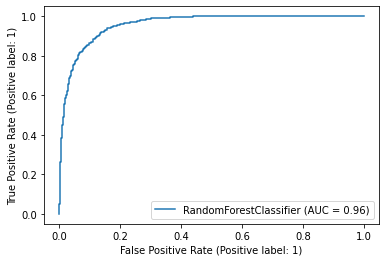

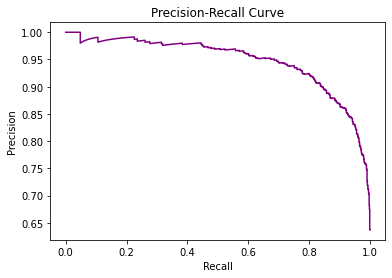

In [ ]:
## Create Random Forest Model with Lemmatized Bag of Words
build_random_forest(x_stemmed_bow, y_train, x_stemmed_bow_val, y_val)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1067
           1       0.92      0.88      0.90      1073

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140



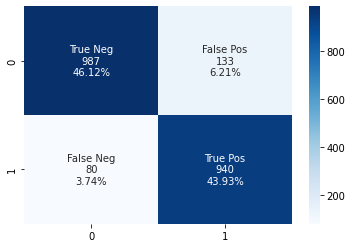

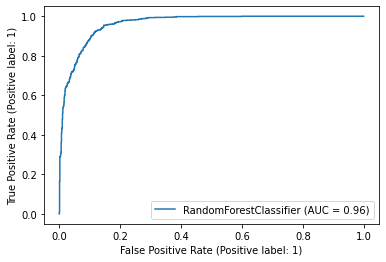

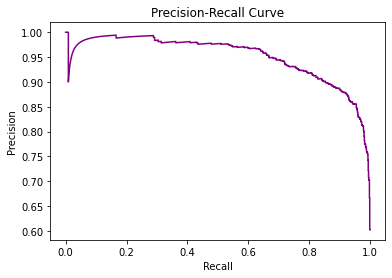

In [ ]:
## Create Random Forest Model with Lemmatized Bag of Words
build_random_forest(x_stemmed_bow, y_train, x_stemmed_bow_test, y_test)

## Random Forest with TFIDF

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1277
           1       0.70      0.82      0.76       863

    accuracy                           0.78      2140
   macro avg       0.78      0.79      0.78      2140
weighted avg       0.80      0.78      0.79      2140



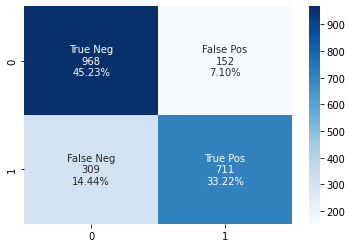

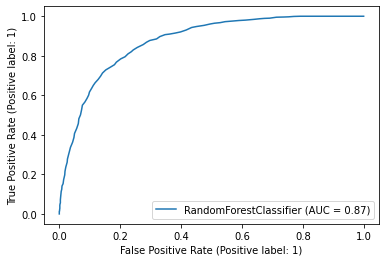

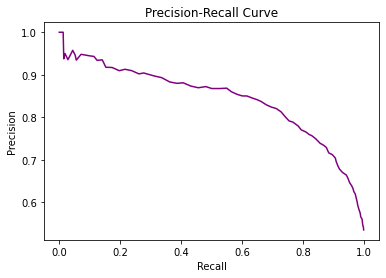

In [ ]:
## Create Random Forest Model with Lemmatized TFIDF
build_random_forest(x_lemmatized_tfidf, y_train, x_lemmatized_tfidf_val, y_val)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1311
           1       0.67      0.83      0.74       829

    accuracy                           0.78      2140
   macro avg       0.77      0.79      0.77      2140
weighted avg       0.79      0.78      0.78      2140



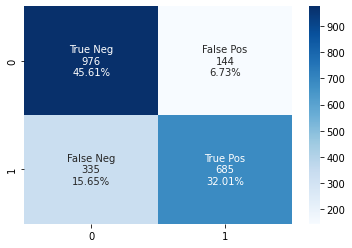

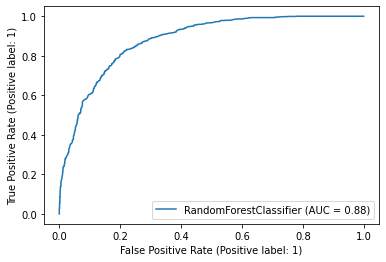

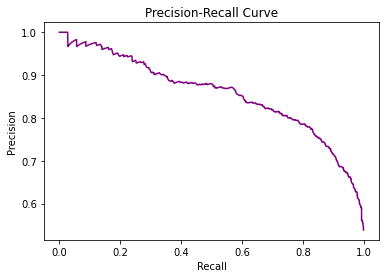

In [ ]:
build_random_forest(x_lemmatized_tfidf, y_train, x_lemmatized_tfidf_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1324
           1       0.67      0.84      0.74       816

    accuracy                           0.78      2140
   macro avg       0.78      0.79      0.78      2140
weighted avg       0.80      0.78      0.78      2140



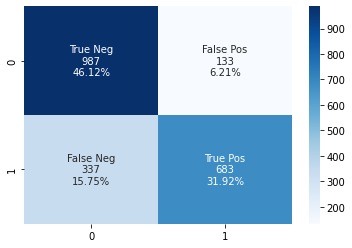

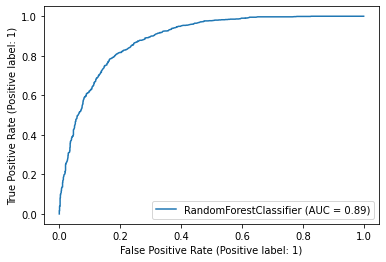

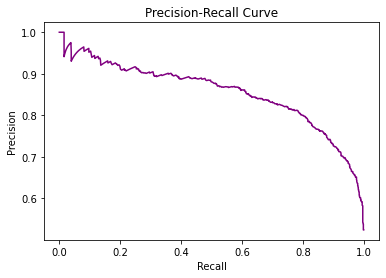

In [ ]:
build_random_forest(x_stemmed_tfidf, y_train, x_stemmed_tfidf_val, y_val)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1078
           1       0.91      0.88      0.89      1062

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140



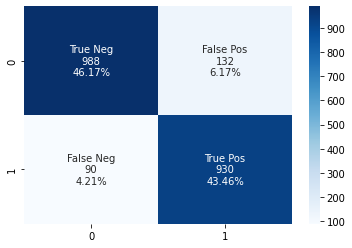

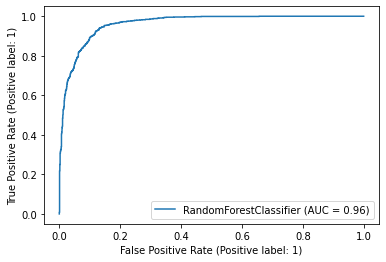

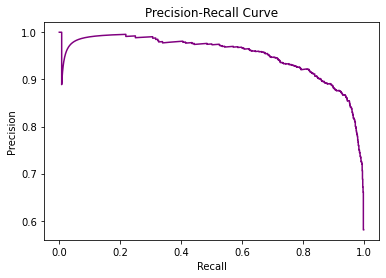

In [ ]:
build_random_forest(x_stemmed_tfidf, y_train, x_stemmed_tfidf_test, y_test)

## Random Forest with Continuous Bag of Words

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1303
           1       0.69      0.84      0.76       837

    accuracy                           0.79      2140
   macro avg       0.79      0.80      0.79      2140
weighted avg       0.81      0.79      0.80      2140



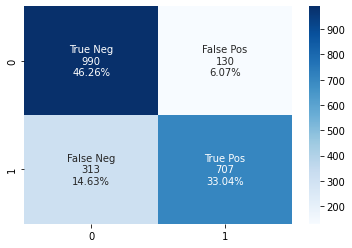

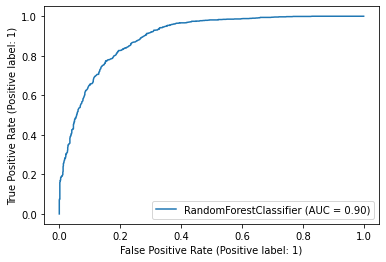

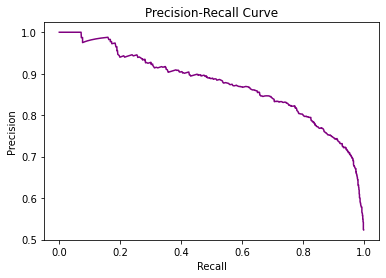

In [ ]:
build_random_forest(lemmatized_train_CBOW, y_train, lemmatized_val_CBOW, y_val)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1308
           1       0.69      0.84      0.76       832

    accuracy                           0.79      2140
   macro avg       0.79      0.80      0.79      2140
weighted avg       0.81      0.79      0.79      2140



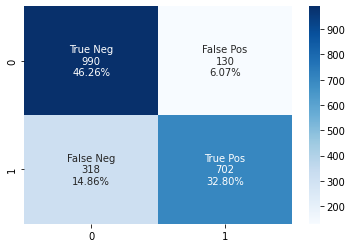

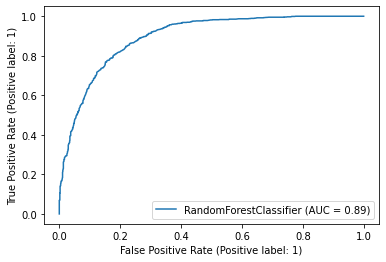

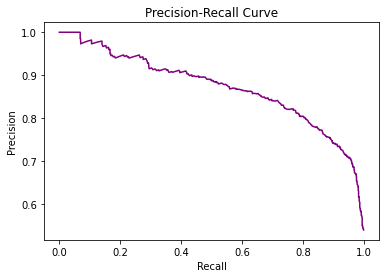

In [ ]:
build_random_forest(lemmatized_train_CBOW, y_train, lemmatized_test_CBOW, y_val)

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1293
           1       0.71      0.85      0.77       847

    accuracy                           0.80      2140
   macro avg       0.80      0.81      0.80      2140
weighted avg       0.82      0.80      0.80      2140



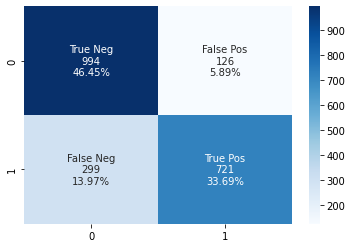

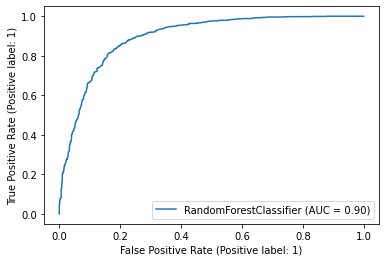

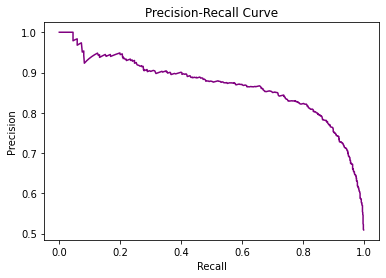

In [ ]:
build_random_forest(stemmed_train_CBOW, y_train, stemmed_val_CBOW, y_val)

              precision    recall  f1-score   support

           0       0.58      0.50      0.54      1290
           1       0.37      0.45      0.41       850

    accuracy                           0.48      2140
   macro avg       0.48      0.48      0.47      2140
weighted avg       0.50      0.48      0.49      2140



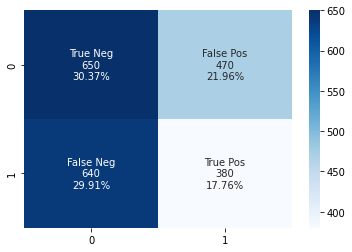

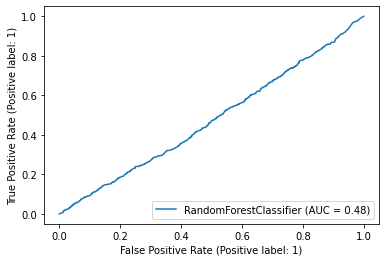

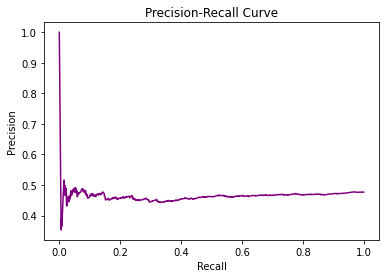

In [ ]:
build_random_forest(stemmed_train_CBOW, y_train, stemmed_test_CBOW, y_test)

## Random Forest with Skip-Gram

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1402
           1       0.61      0.84      0.71       738

    accuracy                           0.76      2140
   macro avg       0.75      0.78      0.75      2140
weighted avg       0.80      0.76      0.77      2140



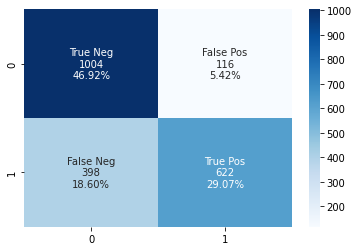

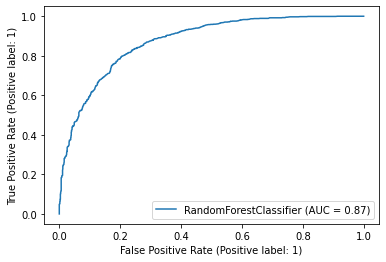

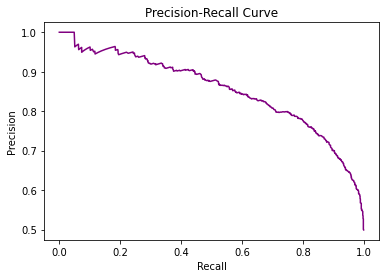

In [ ]:
build_random_forest(lemmatized_train_SG, y_train, lemmatized_val_SG, y_val)

              precision    recall  f1-score   support

           0       0.63      0.51      0.56      1403
           1       0.32      0.45      0.37       737

    accuracy                           0.49      2140
   macro avg       0.48      0.48      0.47      2140
weighted avg       0.53      0.49      0.50      2140



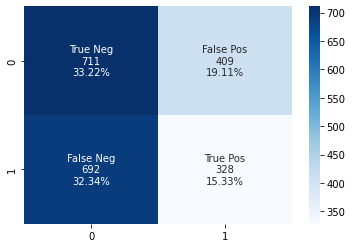

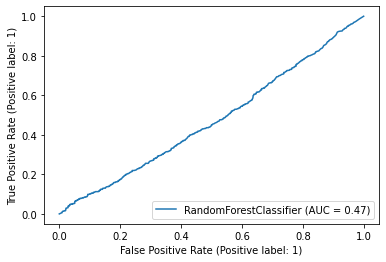

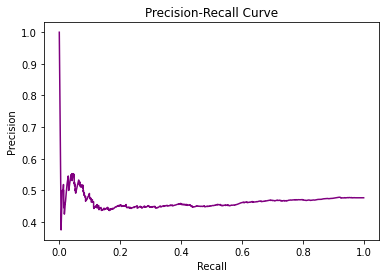

In [ ]:
build_random_forest(lemmatized_train_SG, y_train, lemmatized_test_SG, y_test)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1380
           1       0.63      0.85      0.72       760

    accuracy                           0.77      2140
   macro avg       0.76      0.79      0.76      2140
weighted avg       0.80      0.77      0.78      2140



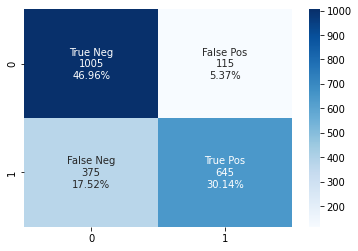

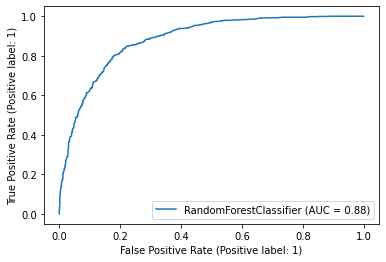

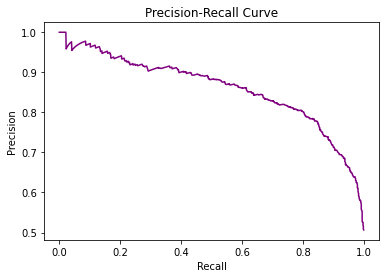

In [ ]:
build_random_forest(stemmed_train_SG, y_train, stemmed_val_SG, y_val)

              precision    recall  f1-score   support

           0       0.63      0.51      0.57      1374
           1       0.35      0.46      0.39       766

    accuracy                           0.49      2140
   macro avg       0.49      0.49      0.48      2140
weighted avg       0.53      0.49      0.50      2140



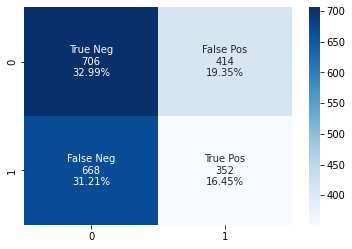

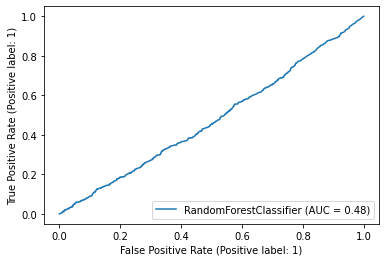

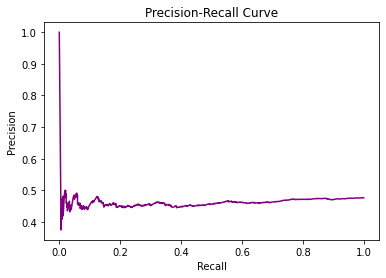

In [ ]:
build_random_forest(stemmed_train_SG, y_train, stemmed_test_SG, y_test)

## KNN Classifier

In [ ]:
# Function to tune KNN classifier to find ideal number of neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
def tune_knn(x_train, y_train):
  leaf_size = list(range(1,50))
  n_neighbors = list(range(1,30))
  metrics = ['euclidean','manhattan']
  weights = ['uniform','distance']
  p=[1,2]
  hyperparameters = dict(leaf_size = leaf_size, n_neighbors=n_neighbors, metric=metrics, weights = weights, p=p)
  knn = KNeighborsClassifier()
  clf = RandomizedSearchCV(knn, hyperparameters, cv=3, n_iter=15, random_state=42, verbose=4)
  best_model = clf.fit(x_train, y_train.ravel())
  return clf.best_params_

In [ ]:
# Obtain best parameters using lemmatized bag of words
best_params =tune_knn(x_lemmatized_bow, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END leaf_size=32, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.617 total time=  10.9s
[CV 2/3] END leaf_size=32, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.621 total time=   8.5s
[CV 3/3] END leaf_size=32, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.630 total time=   8.8s
[CV 1/3] END leaf_size=4, metric=manhattan, n_neighbors=13, p=1, weights=uniform;, score=0.601 total time= 2.0min
[CV 2/3] END leaf_size=4, metric=manhattan, n_neighbors=13, p=1, weights=uniform;, score=0.603 total time= 1.9min
[CV 3/3] END leaf_size=4, metric=manhattan, n_neighbors=13, p=1, weights=uniform;, score=0.614 total time= 1.9min
[CV 1/3] END leaf_size=24, metric=euclidean, n_neighbors=14, p=2, weights=uniform;, score=0.635 total time=   5.2s
[CV 2/3] END leaf_size=24, metric=euclidean, n_neighbors=14, p=2, weights=uniform;, score=0.637 total time=   5.2s
[CV 3/3] END leaf_size

In [ ]:
print(best_params)

{'weights': 'distance', 'p': 1, 'n_neighbors': 1, 'metric': 'euclidean', 'leaf_size': 28}


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
def build_knn(x_train, y_train, x_val, y_val):
  clf = KNeighborsClassifier(n_neighbors = 1, weights='distance', p=1, metric='euclidean', leaf_size=28 )
  clf.fit(x_train, y_train.ravel())
  y_pred = clf.predict(x_val)
  print(classification_report(y_pred,y_val))
  plot_confusion_matrix(y_val, y_pred)
  RocCurveDisplay.from_estimator(clf, x_val, y_val)
  y_score = clf.predict_proba(x_val)[:, 1]
  plot_precision_recall(y_val, y_score)

## KNN on One Hot Encoded Vectors

              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1301
           1       0.61      0.74      0.67       839

    accuracy                           0.71      2140
   macro avg       0.71      0.72      0.71      2140
weighted avg       0.73      0.71      0.72      2140



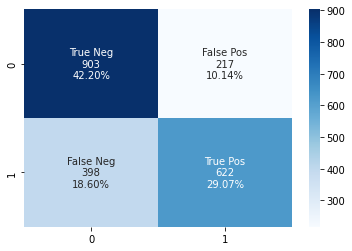

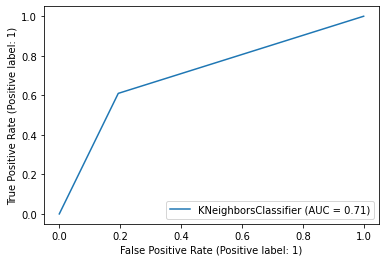

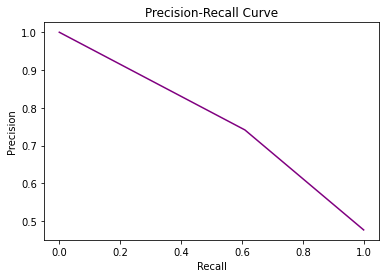

In [ ]:
build_knn(x_lemmatized_ohe, y_train, x_lemmatized_ohe_val, y_val)

              precision    recall  f1-score   support

           0       0.80      0.70      0.74      1285
           1       0.62      0.74      0.67       855

    accuracy                           0.71      2140
   macro avg       0.71      0.72      0.71      2140
weighted avg       0.73      0.71      0.72      2140



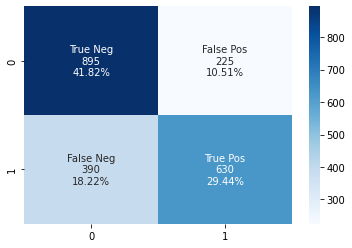

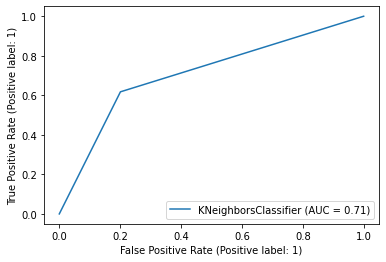

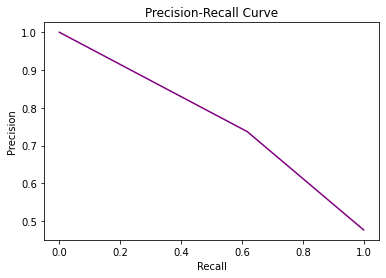

In [ ]:
build_knn(x_lemmatized_ohe, y_train, x_lemmatized_ohe_test, y_test)

              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1301
           1       0.61      0.74      0.67       839

    accuracy                           0.71      2140
   macro avg       0.71      0.72      0.71      2140
weighted avg       0.73      0.71      0.72      2140



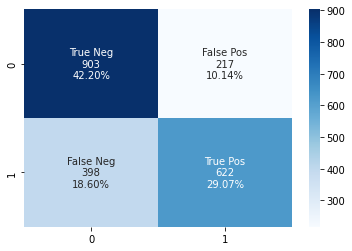

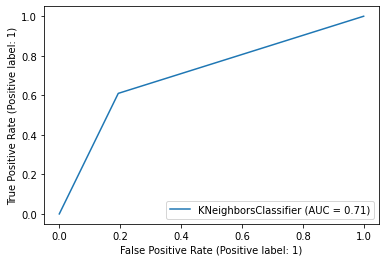

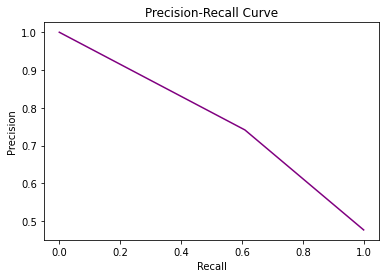

In [ ]:
build_knn(x_stemmed_ohe, y_train, x_stemmed_ohe_val, y_val)

              precision    recall  f1-score   support

           0       0.80      0.70      0.74      1285
           1       0.62      0.74      0.67       855

    accuracy                           0.71      2140
   macro avg       0.71      0.72      0.71      2140
weighted avg       0.73      0.71      0.72      2140



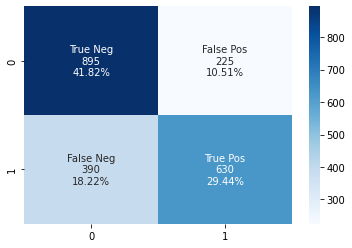

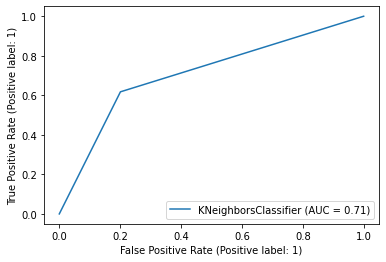

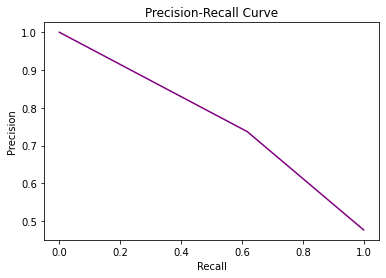

In [ ]:
build_knn(x_stemmed_ohe, y_train, x_stemmed_ohe_test, y_test)

## KNN with Bag of Words

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1257
           1       0.63      0.73      0.67       883

    accuracy                           0.71      2140
   macro avg       0.71      0.71      0.71      2140
weighted avg       0.72      0.71      0.71      2140



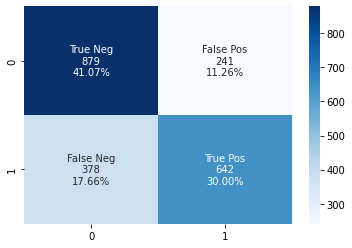

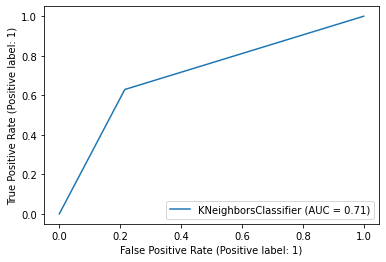

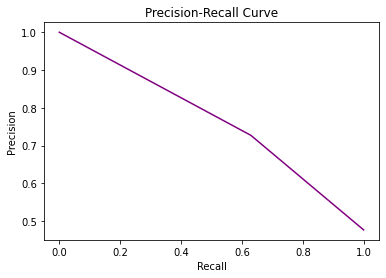

In [ ]:
build_knn(x_lemmatized_bow, y_train, x_lemmatized_bow_val, y_val)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1258
           1       0.63      0.73      0.68       882

    accuracy                           0.71      2140
   macro avg       0.71      0.71      0.71      2140
weighted avg       0.72      0.71      0.71      2140



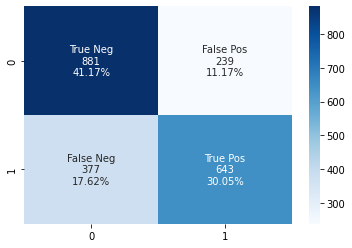

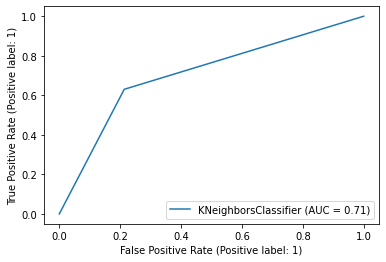

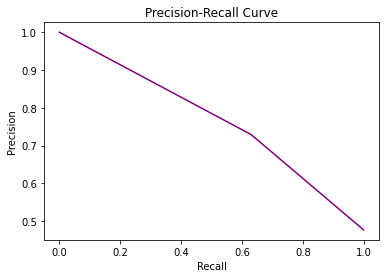

In [ ]:
build_knn(x_lemmatized_bow, y_train, x_lemmatized_bow_test, y_test)

              precision    recall  f1-score   support

           0       0.78      0.71      0.75      1239
           1       0.65      0.73      0.69       901

    accuracy                           0.72      2140
   macro avg       0.72      0.72      0.72      2140
weighted avg       0.73      0.72      0.72      2140



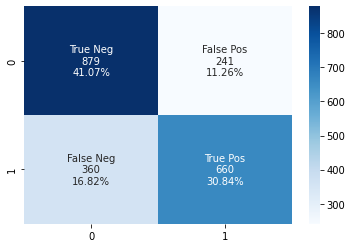

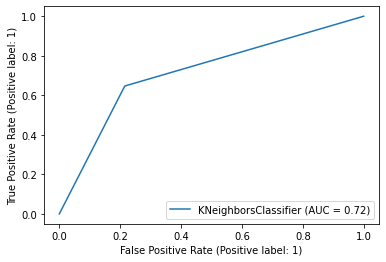

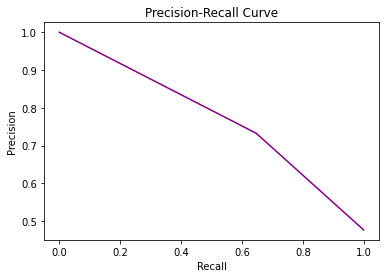

In [ ]:
build_knn(x_stemmed_bow, y_train, x_stemmed_bow_val, y_val)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1225
           1       0.66      0.73      0.69       915

    accuracy                           0.72      2140
   macro avg       0.72      0.73      0.72      2140
weighted avg       0.73      0.72      0.73      2140



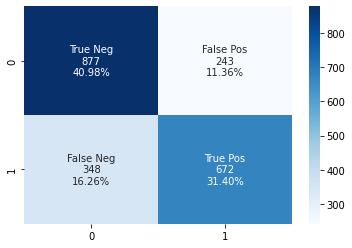

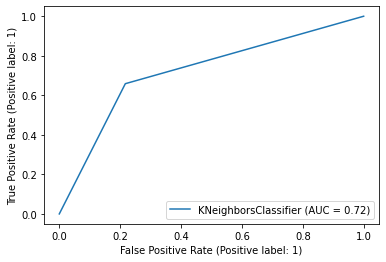

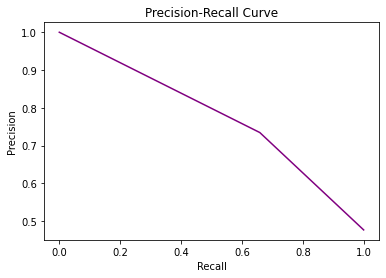

In [ ]:
build_knn(x_stemmed_bow, y_train, x_stemmed_bow_test, y_test)

## KNN with TFIDF

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1188
           1       0.85      0.91      0.88       952

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140



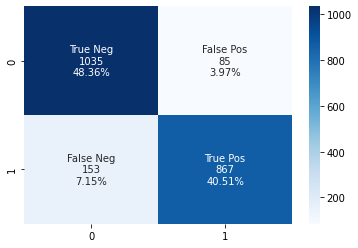

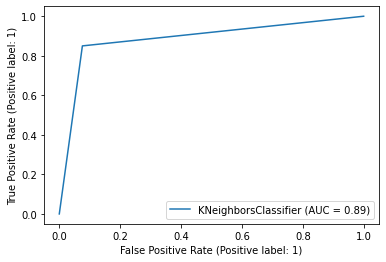

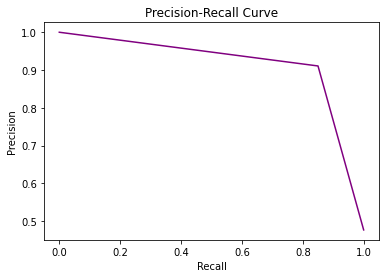

In [ ]:
build_knn(x_lemmatized_tfidf, y_train, x_lemmatized_tfidf_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1186
           1       0.84      0.89      0.86       954

    accuracy                           0.87      2140
   macro avg       0.87      0.88      0.87      2140
weighted avg       0.88      0.87      0.88      2140



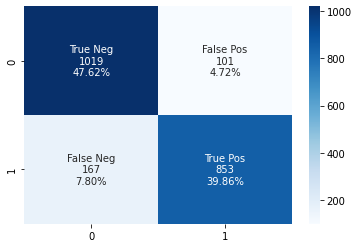

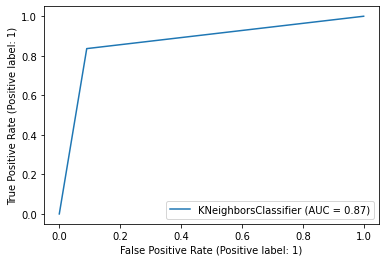

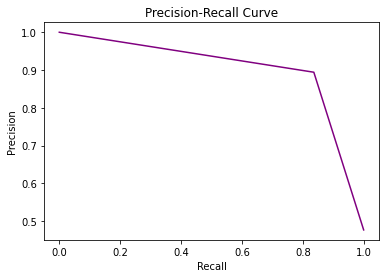

In [ ]:
build_knn(x_lemmatized_tfidf, y_train, x_lemmatized_tfidf_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1202
           1       0.84      0.91      0.88       938

    accuracy                           0.89      2140
   macro avg       0.88      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140



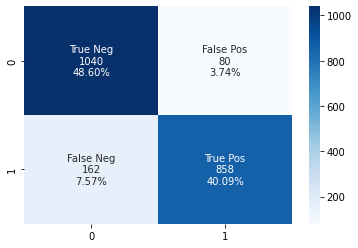

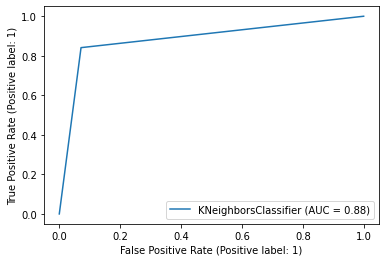

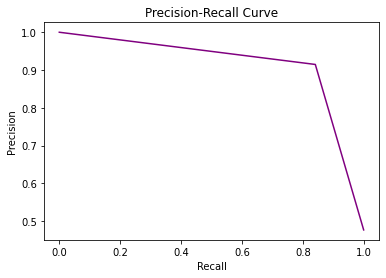

In [ ]:
build_knn(x_stemmed_tfidf, y_train, x_stemmed_tfidf_val, y_val)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1211
           1       0.83      0.91      0.87       929

    accuracy                           0.88      2140
   macro avg       0.88      0.88      0.88      2140
weighted avg       0.88      0.88      0.88      2140



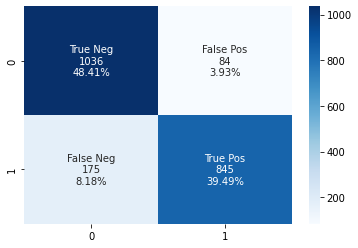

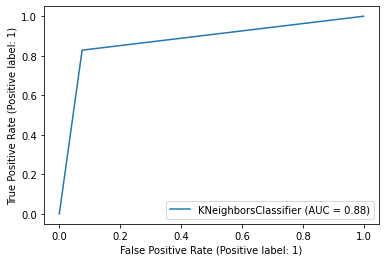

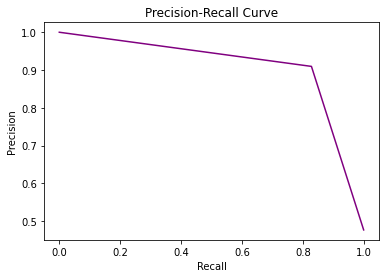

In [ ]:
build_knn(x_stemmed_tfidf, y_train, x_stemmed_tfidf_test, y_test)

## KNN with Continuous Bag of Words

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      1218
           1       0.69      0.77      0.73       922

    accuracy                           0.75      2140
   macro avg       0.75      0.76      0.75      2140
weighted avg       0.76      0.75      0.76      2140



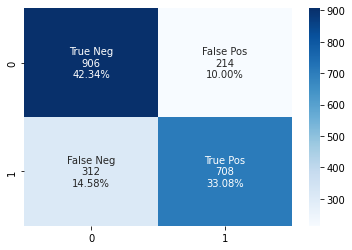

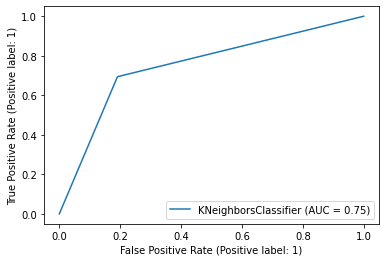

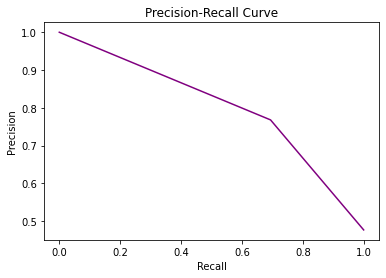

In [ ]:
build_knn(lemmatized_train_CBOW, y_train, lemmatized_val_CBOW, y_val)

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      1218
           1       0.69      0.77      0.73       922

    accuracy                           0.75      2140
   macro avg       0.75      0.76      0.75      2140
weighted avg       0.76      0.75      0.76      2140



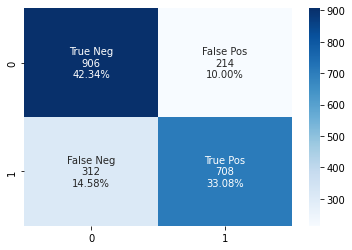

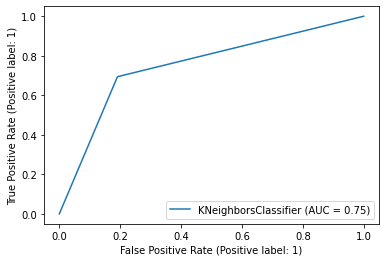

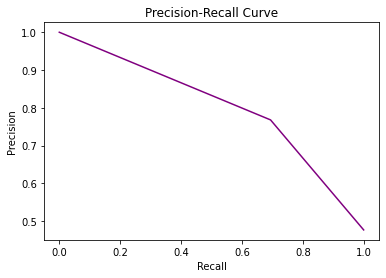

In [ ]:
build_knn(lemmatized_train_CBOW, y_train, lemmatized_test_CBOW, y_val)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1243
           1       0.68      0.78      0.73       897

    accuracy                           0.76      2140
   macro avg       0.75      0.76      0.75      2140
weighted avg       0.76      0.76      0.76      2140



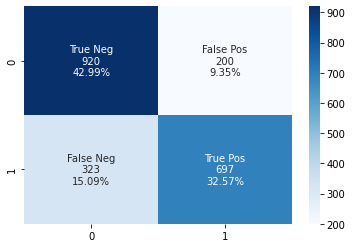

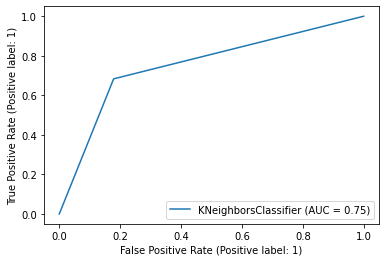

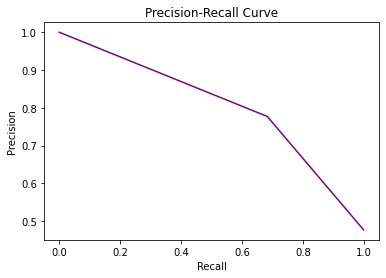

In [ ]:
build_knn(stemmed_train_CBOW, y_train, stemmed_val_CBOW, y_val)

              precision    recall  f1-score   support

           0       0.57      0.51      0.54      1243
           1       0.40      0.46      0.43       897

    accuracy                           0.49      2140
   macro avg       0.49      0.49      0.48      2140
weighted avg       0.50      0.49      0.49      2140



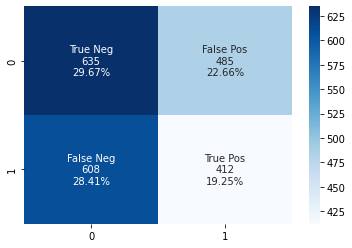

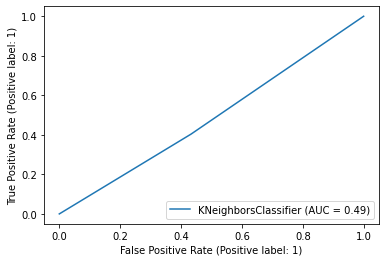

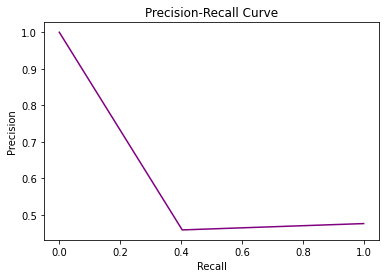

In [ ]:
build_knn(stemmed_train_CBOW, y_train, stemmed_test_CBOW, y_test)

## KNN with Skip-Gram

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1422
           1       0.57      0.81      0.67       718

    accuracy                           0.73      2140
   macro avg       0.72      0.75      0.72      2140
weighted avg       0.78      0.73      0.74      2140



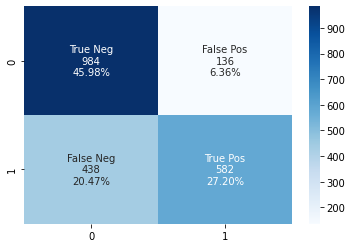

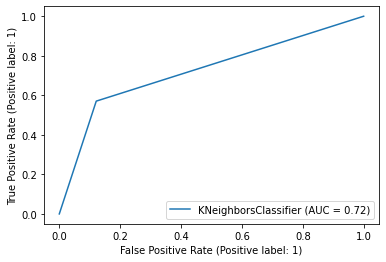

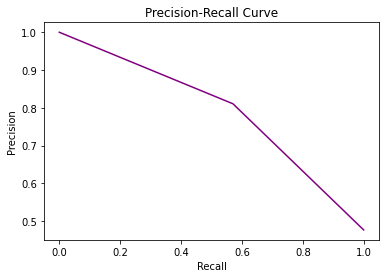

In [ ]:
build_knn(lemmatized_train_SG, y_train, lemmatized_val_SG, y_val)

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      1422
           1       0.33      0.46      0.38       718

    accuracy                           0.50      2140
   macro avg       0.49      0.49      0.48      2140
weighted avg       0.55      0.50      0.51      2140



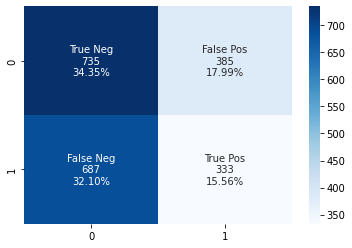

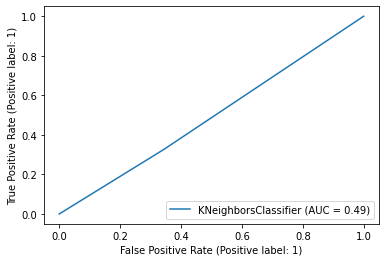

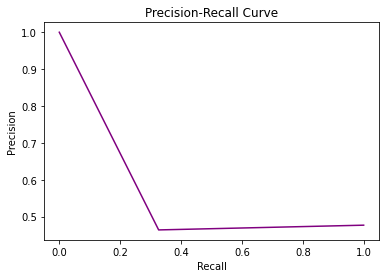

In [ ]:
build_knn(lemmatized_train_SG, y_train, lemmatized_test_SG, y_test)

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1467
           1       0.52      0.79      0.63       673

    accuracy                           0.70      2140
   macro avg       0.70      0.73      0.69      2140
weighted avg       0.76      0.70      0.71      2140



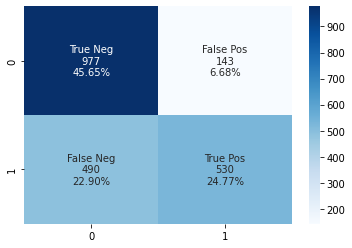

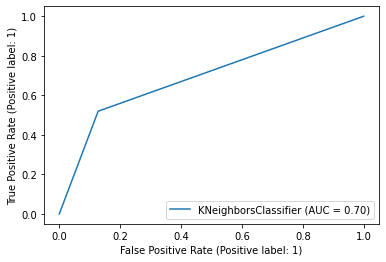

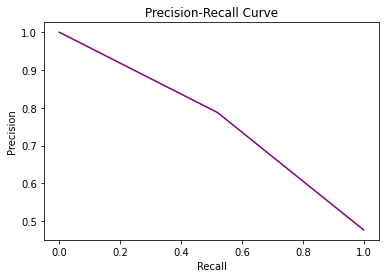

In [ ]:
build_knn(stemmed_train_SG, y_train, stemmed_val_SG, y_val)

              precision    recall  f1-score   support

           0       0.67      0.51      0.58      1467
           1       0.30      0.45      0.36       673

    accuracy                           0.49      2140
   macro avg       0.49      0.48      0.47      2140
weighted avg       0.55      0.49      0.51      2140



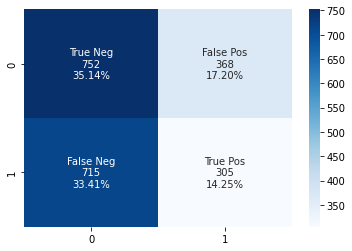

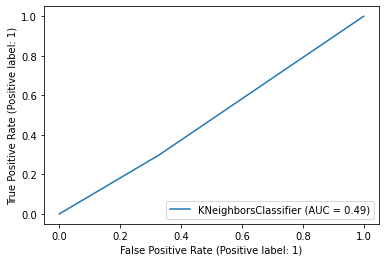

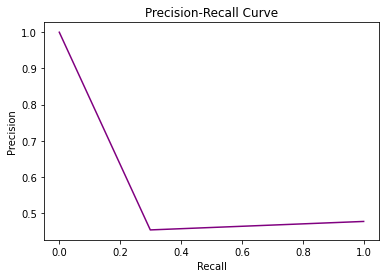

In [ ]:
build_knn(stemmed_train_SG, y_train, stemmed_test_SG, y_test)

## Further Analysis for Bi-Directional LSTM

In [ ]:
## Obtain total number of words present in lemmatized reviews
list_of_words = []
for i in x_train.lemmatized_tweet:
    for j in i:
        list_of_words.append(j)
        
total_words_lemmatized_news = len(list(set(list_of_words)))

In [ ]:
## Obtain total number of words present in stemmed reviews
list_of_words = []
for i in x_train.stemmed_tweet:
    for j in i:
        list_of_words.append(j)
        
total_words_stemmed_news = len(list(set(list_of_words)))

In [ ]:
## Create Tokenized Word Embeddings for LSTM
from keras.preprocessing.text import Tokenizer
x_train_stemmed = x_train['stemmed_tweet'].array
x_val_stemmed = x_val['stemmed_tweet'].array
x_train_lemmatized = x_train['lemmatized_tweet'].array
x_val_lemmatized = x_val['lemmatized_tweet'].array

tokenizer = Tokenizer(num_words = total_words_lemmatized_news)
tokenizer.fit_on_texts(x_train_lemmatized)
train_lemmatized_sequences = tokenizer.texts_to_sequences(x_train_lemmatized)
val_lemmatized_sequences = tokenizer.texts_to_sequences(x_val_lemmatized)

tokenizer = Tokenizer(num_words = total_words_stemmed_news)
tokenizer.fit_on_texts(x_train_stemmed)
train_stemmed_sequences = tokenizer.texts_to_sequences(x_train_stemmed)
val_stemmed_sequences = tokenizer.texts_to_sequences(x_val_stemmed)

In [ ]:
print("The encoding for document \n", x_train['stemmed_tweet'][0], "\n is: ", train_stemmed_sequences[0])

The encoding for document 
 cdc current report 99031 death gener discrep death count differ sourc small explic death toll stand roughli 100000 peopl today 
 is:  [77, 107, 6, 8, 8, 225, 8, 10, 22]


In [ ]:
print("The encoding for document \n", x_train['lemmatized_tweet'][0], "\n is: ", train_lemmatized_sequences[0])

The encoding for document 
 cdc currently report 99031 death general discrepancy death count different source small explicable death toll stand roughly 100000 people today 
 is:  [70, 221, 23, 7, 7, 7, 9, 22]


In [ ]:
# Obtain Max Length of a News Article to obtain size for padding
maxlen_stemmed_news = 0
for doc in x_train.stemmed_tweet:
    tokens = doc.split(" ")
    if (maxlen_stemmed_news < len(tokens)):
        maxlen_stemmed_news = len(tokens)
        
maxlen_lemmatized_news = 0
for doc in x_train.lemmatized_tweet:
    tokens = doc.split(" ")
    if (maxlen_lemmatized_news < len(tokens)):
        maxlen_lemmatized_news = len(tokens)

print(maxlen_stemmed_news)
print(maxlen_lemmatized_news)

913
913


In [ ]:
# pad sequences to ensure same document length
from keras.preprocessing.sequence import pad_sequences
padded_stemmed_train = pad_sequences(train_stemmed_sequences, maxlen = maxlen_stemmed_news, padding='post', truncating='post')
padded_stemmed_val = pad_sequences(val_stemmed_sequences, maxlen = maxlen_stemmed_news, truncating = 'post')

padded_lemmatized_train = pad_sequences(train_lemmatized_sequences, maxlen = maxlen_lemmatized_news, padding='post', truncating='post')
padded_lemmatized_val = pad_sequences(val_lemmatized_sequences, maxlen = maxlen_lemmatized_news, truncating='post')


### Bidirectional LSTM Model

The first step in building the model was to tune the model's hyperparameters. Initially, gridsearch and randomized search through scikit-learn were attempted. However, due to the time required to complete each of these, a randomized search with Keras Tuner was conducted instead. Through this process, two challenges were observed. The first is that the validation set was very overfit and a constant validation accuracy was observed through repeated trials of running the tuner. The second is that the models appeared to be hitting a vanishing gradient as the loss did not change from one epoch to the next. To deal with this challenge, a couple of different solutions are proposed which include l1 or l2 regularization, and running the model with a fewer parameters and a smaller batch size. Once a learning rate and other parameters were established through the Keras Tuner, the best model was run for 5 epochs. Similary, a model with l1 regularization added, a model with l2 regularization added, a model with fewer parameters, and a model with a smaller batch size were run over 5 epochs to identify the optimal parameters for the model. While better performance could have been acheived on this model, due to time constraints and the time required for training, it was not possible to continue further tuning.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization
#from keras.optimizers import rmsprop

def bidirectional_LSTM(hp):
    #output_size, lstm_unit, hiddenLayerOne, hiddenLayerTwo):
  ## Build Bi-Directional LSTM

  model = Sequential()

  initializer = tf.keras.initializers.HeNormal()

  # Add embedding layer to represent our feature vectors in lower dimensional space
  model.add(Embedding(total_words_lemmatized_news, output_dim = hp.Int("output_dim", min_value=8, max_value=64, step=8)))

  #model.add(Flatten())

  # Add bidirectional layer
  model.add(Bidirectional(LSTM(hp.Int("units", min_value=8, max_value=64, step=8))))

  # Add Dense Layer
  model.add(Dense(hp.Int("units1", min_value=8, max_value=64, step=8), activation = 'relu', kernel_initializer=initializer))
  model.add(Dropout(hp.Choice('dropout1', [0.2,0.3,0.4,0.5])))
  model.add(BatchNormalization())
  model.add(Dense(hp.Int("units2", min_value=8, max_value=64, step=8), activation = 'relu', kernel_initializer=initializer))
  model.add(Dropout(hp.Choice('dropout2', [0.2,0.3,0.4,0.5])))

  # Add Dense Layer
  #model.add(Dense(hiddenLayerTwo, activation = 'relu'))

  # Add output layer
  model.add(Dense(1, activation = 'sigmoid'))

  #hp_lr = hp.Choice('learning_rate', values=[0.0001, 0.00001])
  #hp_optimizer = hp.Choice('optimizer', values=[SGD, RMSprop, Adam])

  #if hp_optimizer == 'sgd':
    #optimizer = SGD(learning_rate=hp_lr)
    #hp.Float('lrate', min_value=1e-4, max_value=1e-2)
  #elif hp_optimizer == 'rmsprop':
    #optimizer = RMSprop(learning_rate=hp_lr)
 #   hp.Float('lrate', min_value=1e-4, max_value=1e-2)
 # elif hp_optimizer == 'adam':
    #optimizer = Adam(learning_rate=hp_lr)
 #   hp.Float('lrate', min_value=1e-4, max_value=1e-2)
 # else:
 #   raise
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
  #optim=hp.Choice("optimizer",["SGD","RMSProp"])
  model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss = "binary_crossentropy", metrics = ['acc'])
  #model.summary()
  return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
model=KerasClassifier(build_fn=bidirectional_LSTM)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras_tuner

In [ ]:
tuner = keras_tuner.RandomSearch(
    bidirectional_LSTM,
    objective='val_loss',
    max_trials=10,
    overwrite=True)

tuner.search(padded_lemmatized_train, y_train, epochs=3, validation_data = (padded_lemmatized_val, y_val))


Trial 10 Complete [00h 13m 28s]
val_loss: 1.005833387374878

Best val_loss So Far: 0.6903443336486816
Total elapsed time: 02h 37m 53s


In [ ]:
## Obtain the best parameters from the Keras tuner
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the embedding layer is {best_hps.get('output_dim')}, the optimal number of units in the bidirectional LSTM layer is {best_hps.get('units')}, the optimal number 
of units in the first densely connected layer is {best_hps.get('units1')}, the optimal dropout percentage in the first dropout layer is {best_hps.get('dropout1')}, the optimal number of units in the second densely connected 
layer is {best_hps.get('units2')}, the optimal dropout percentage in the second dropout layer is {best_hps.get('dropout2')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the embedding layer is 56, the optimal number of units in the bidirectional LSTM layer is 56, the optimal number 
of units in the first densely connected layer is 48, the optimal dropout percentage in the first dropout layer is 0.2, the optimal number of units in the second densely connected 
layer is 32, the optimal dropout percentage in the second dropout layer is 0.4 and the optimal learning rate for the optimizer is 1e-05.



Attempted to use GridSearchCV or RandomizedCV but found Keras Tuner to be a better and faster approach.

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#params={'batch_size':[8, 16, 64, 128], 
#        'nb_epoch':[10, 20, 30],
#        'output_size':[16, 32, 64, 128],
#        'lstm_unit':[16, 32, 64, 128, 256],
#        'hiddenLayerOne':[32, 64, 128, 256],
#        'hiddenLayerTwo': [16, 32, 64, 128],  
#        }
#gs=GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=3)
# now fit the dataset to the GridSearchCV object. 
#searcher = RandomizedSearchCV(estimator=model, n_jobs=-1, cv=3, verbose =10, param_distributions=params, scoring="accuracy")
#searchResults = searcher.fit(padded_lemmatized_train, y_train)
#gs = gs.fit(padded_lemmatized_train, y_train)

Running the suggested tuned model over a few more epochs to observe its performance. The same model will then be run with different regularization techniques to correct for overfitting and compared for performance.

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeNormal()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 56))

# Add bidirectional layer
model.add(Bidirectional(LSTM(56)))

# Add Dense Layers
model.add(Dense(48, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.4))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 56)          13944     
                                                                 
 bidirectional_2 (Bidirectio  (None, 112)              50624     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 48)                5424      
                                                                 
 dropout_4 (Dropout)         (None, 48)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 32)               

In [ ]:
history = model.fit(padded_lemmatized_train, y_train, batch_size = 32, validation_data = (padded_lemmatized_val, y_val), epochs = 5)

Epoch 1/5
210/210 [==============================] - 391s 2s/step - loss: 0.6846 - acc: 0.5524 - val_loss: 0.6882 - val_acc: 0.6271
Epoch 2/5
210/210 [==============================] - 375s 2s/step - loss: 0.6488 - acc: 0.6286 - val_loss: 0.6794 - val_acc: 0.6603
Epoch 3/5
210/210 [==============================] - 372s 2s/step - loss: 0.6230 - acc: 0.6695 - val_loss: 0.6596 - val_acc: 0.6724
Epoch 4/5
210/210 [==============================] - 373s 2s/step - loss: 0.5920 - acc: 0.7036 - val_loss: 0.6532 - val_acc: 0.6061
Epoch 5/5
210/210 [==============================] - 370s 2s/step - loss: 0.5652 - acc: 0.7308 - val_loss: 0.6770 - val_acc: 0.5495


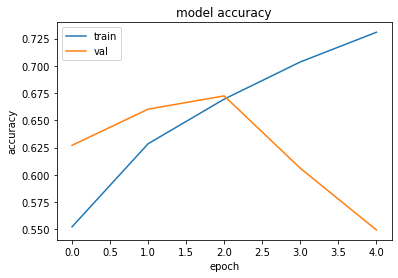

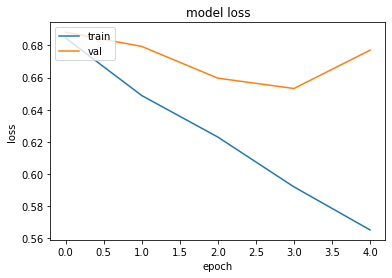

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Reducing Model Units in Model to see if it results in improved performance as model is experiencing substantial overfitting
model = Sequential()
initializer = tf.keras.initializers.HeNormal()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 32))

# Add bidirectional layer
model.add(Bidirectional(LSTM(32)))

# Add Dense Layers
model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.4))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          7968      
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 32)               

In [ ]:
history = model.fit(padded_lemmatized_train, y_train, batch_size = 32, validation_data = (padded_lemmatized_val, y_val), epochs = 5)

Epoch 1/5
210/210 [==============================] - 254s 1s/step - loss: 0.7031 - acc: 0.5152 - val_loss: 0.6911 - val_acc: 0.5397
Epoch 2/5
210/210 [==============================] - 252s 1s/step - loss: 0.6806 - acc: 0.5449 - val_loss: 0.6896 - val_acc: 0.5453
Epoch 3/5
210/210 [==============================] - 254s 1s/step - loss: 0.6535 - acc: 0.5917 - val_loss: 0.6906 - val_acc: 0.5402
Epoch 4/5
210/210 [==============================] - 258s 1s/step - loss: 0.6315 - acc: 0.6296 - val_loss: 0.6999 - val_acc: 0.4995
Epoch 5/5
210/210 [==============================] - 257s 1s/step - loss: 0.6037 - acc: 0.6656 - val_loss: 0.7249 - val_acc: 0.4832


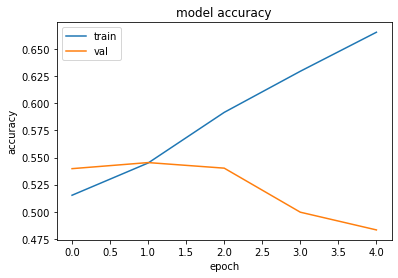

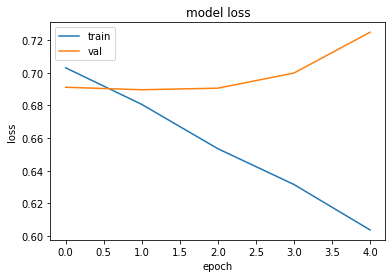

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeNormal()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 56))

# Add bidirectional layer
model.add(Bidirectional(LSTM(56)))

# Add Dense Layers
model.add(Dense(48, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 56)          13944     
                                                                 
 bidirectional (Bidirectiona  (None, 112)              50624     
 l)                                                              
                                                                 
 dense (Dense)               (None, 48)                5424      
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 batch_normalization (BatchN  (None, 48)               192       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                1

In [ ]:
history = model.fit(padded_lemmatized_train, y_train, batch_size = 32, validation_data = (padded_lemmatized_val, y_val), epochs = 5)

Epoch 1/5
210/210 [==============================] - 357s 2s/step - loss: 0.7146 - acc: 0.5289 - val_loss: 0.6908 - val_acc: 0.6196
Epoch 2/5
210/210 [==============================] - 350s 2s/step - loss: 0.6826 - acc: 0.5658 - val_loss: 0.6883 - val_acc: 0.5995
Epoch 3/5
210/210 [==============================] - 350s 2s/step - loss: 0.6619 - acc: 0.5939 - val_loss: 0.6867 - val_acc: 0.5430
Epoch 4/5
210/210 [==============================] - 348s 2s/step - loss: 0.6413 - acc: 0.6263 - val_loss: 0.6919 - val_acc: 0.5182
Epoch 5/5
210/210 [==============================] - 348s 2s/step - loss: 0.6290 - acc: 0.6382 - val_loss: 0.7094 - val_acc: 0.4916


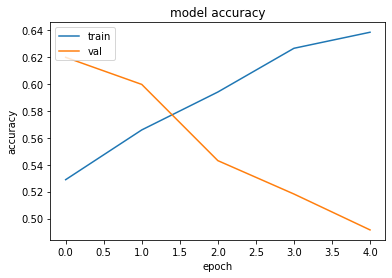

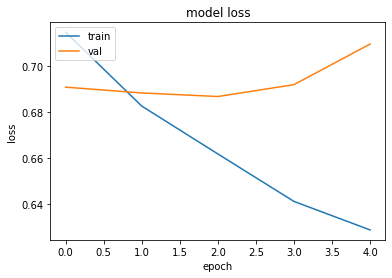

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeNormal()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 56))

# Add bidirectional layer
model.add(Bidirectional(LSTM(56)))

# Add Dense Layers
model.add(Dense(48, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.4))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 56)          13944     
                                                                 
 bidirectional_1 (Bidirectio  (None, 112)              50624     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 48)                5424      
                                                                 
 dropout_2 (Dropout)         (None, 48)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 32)               

In [ ]:
history = model.fit(padded_lemmatized_train, y_train, batch_size = 16, validation_data = (padded_lemmatized_val, y_val), epochs = 5)

Epoch 1/5
420/420 [==============================] - 610s 1s/step - loss: 0.6820 - acc: 0.5543 - val_loss: 0.6866 - val_acc: 0.6229
Epoch 2/5
420/420 [==============================] - 604s 1s/step - loss: 0.6378 - acc: 0.6513 - val_loss: 0.7235 - val_acc: 0.4766
Epoch 3/5
420/420 [==============================] - 603s 1s/step - loss: 0.5959 - acc: 0.7141 - val_loss: 0.8116 - val_acc: 0.4766
Epoch 4/5
420/420 [==============================] - 604s 1s/step - loss: 0.5529 - acc: 0.7496 - val_loss: 0.8680 - val_acc: 0.4766
Epoch 5/5
420/420 [==============================] - 601s 1s/step - loss: 0.5237 - acc: 0.7686 - val_loss: 0.9214 - val_acc: 0.4766


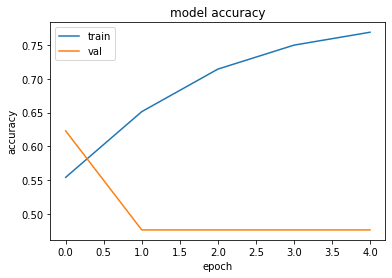

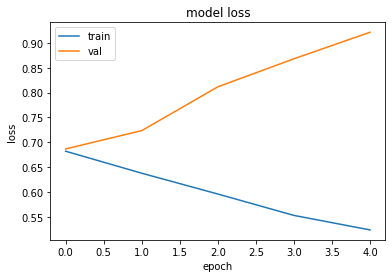

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeNormal()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 56))

# Add bidirectional layer
model.add(Bidirectional(LSTM(56)))

# Add Dense Layers
model.add(Dense(48, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.4))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.00001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 56)          13944     
                                                                 
 bidirectional_2 (Bidirectio  (None, 112)              50624     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 48)                5424      
                                                                 
 dropout_4 (Dropout)         (None, 48)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 32)               

In [ ]:
history = model.fit(padded_lemmatized_train, y_train, batch_size = 32, validation_data = (padded_lemmatized_val, y_val), epochs = 5)

Epoch 1/5
210/210 [==============================] - 361s 2s/step - loss: 0.7206 - acc: 0.5004 - val_loss: 0.6901 - val_acc: 0.5234
Epoch 2/5
210/210 [==============================] - 354s 2s/step - loss: 0.7134 - acc: 0.5109 - val_loss: 0.6884 - val_acc: 0.5234
Epoch 3/5
210/210 [==============================] - 356s 2s/step - loss: 0.7057 - acc: 0.5247 - val_loss: 0.7002 - val_acc: 0.5234
Epoch 4/5
210/210 [==============================] - 355s 2s/step - loss: 0.7035 - acc: 0.5293 - val_loss: 0.7220 - val_acc: 0.5234
Epoch 5/5
210/210 [==============================] - 356s 2s/step - loss: 0.6969 - acc: 0.5368 - val_loss: 0.7260 - val_acc: 0.5234


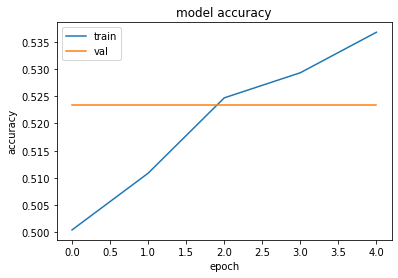

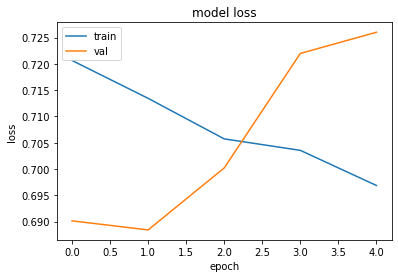

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeNormal()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 56))

# Add bidirectional layer
model.add(Bidirectional(LSTM(56)))

# Add Dense Layers
model.add(Dense(48, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
#model.add(BatchNormalization())
#model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
#model.add(Dropout(0.4))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 56)          13944     
                                                                 
 bidirectional_5 (Bidirectio  (None, 112)              50624     
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 48)                5424      
                                                                 
 dropout_8 (Dropout)         (None, 48)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 49        
                                                                 
Total params: 70,041
Trainable params: 70,041
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(padded_lemmatized_train, y_train, batch_size = 32, validation_data = (padded_lemmatized_val, y_val), epochs = 5)

Epoch 1/5
210/210 [==============================] - 359s 2s/step - loss: 0.6915 - acc: 0.5501 - val_loss: 0.6931 - val_acc: 0.4766
Epoch 2/5
210/210 [==============================] - 374s 2s/step - loss: 0.6884 - acc: 0.6579 - val_loss: 0.6935 - val_acc: 0.4766
Epoch 3/5
 29/210 [===>..........................] - ETA: 4:58 - loss: 0.6852 - acc: 0.7349

KeyboardInterrupt: ignored

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeNormal()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 8))

# Add bidirectional layer
model.add(Bidirectional(LSTM(8)))

# Add Dense Layers
model.add(Dense(8, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
#model.add(BatchNormalization())
#model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
#model.add(Dropout(0.4))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 8)           1992      
                                                                 
 bidirectional_8 (Bidirectio  (None, 16)               1088      
 nal)                                                            
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,225
Trainable params: 3,225
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(padded_lemmatized_train, y_train, batch_size = 32, validation_data = (padded_lemmatized_val, y_val), epochs = 5)

Epoch 1/5
210/210 [==============================] - 202s 947ms/step - loss: 0.5776 - acc: 0.7068 - val_loss: 1.0360 - val_acc: 0.4766
Epoch 2/5
210/210 [==============================] - 179s 851ms/step - loss: 0.3404 - acc: 0.8579 - val_loss: 0.9556 - val_acc: 0.4766
Epoch 3/5
 86/210 [===========>..................] - ETA: 1:38 - loss: 0.2833 - acc: 0.8844

KeyboardInterrupt: ignored

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeNormal()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 4))

# Add bidirectional layer
model.add(Bidirectional(LSTM(2)))

# Add Dense Layers
model.add(Dense(2, activation = 'relu', kernel_initializer=initializer))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
#model.add(Dense(32, activation = 'relu', kernel_initializer=initializer))
#model.add(Dropout(0.4))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, None, 4)           996       
                                                                 
 bidirectional_31 (Bidirecti  (None, 4)                112       
 onal)                                                           
                                                                 
 dense_65 (Dense)            (None, 2)                 10        
                                                                 
 dropout_34 (Dropout)        (None, 2)                 0         
                                                                 
 dense_66 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
___________________________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(padded_lemmatized_train, y_train, batch_size = 32, validation_data = (padded_lemmatized_val, y_val), epochs = 20, callbacks=[callback])

Epoch 1/20
210/210 [==============================] - 175s 811ms/step - loss: 0.6500 - acc: 0.6003 - val_loss: 0.9840 - val_acc: 0.4766
Epoch 2/20
210/210 [==============================] - 170s 812ms/step - loss: 0.5625 - acc: 0.7598 - val_loss: 0.9336 - val_acc: 0.4766
Epoch 3/20
210/210 [==============================] - 170s 807ms/step - loss: 0.5236 - acc: 0.7832 - val_loss: 0.9827 - val_acc: 0.4766
Epoch 4/20
210/210 [==============================] - 172s 819ms/step - loss: 0.5073 - acc: 0.7879 - val_loss: 0.9749 - val_acc: 0.4766
Epoch 5/20
210/210 [==============================] - 170s 811ms/step - loss: 0.4881 - acc: 0.7958 - val_loss: 0.9877 - val_acc: 0.4766
Epoch 6/20
210/210 [==============================] - 172s 820ms/step - loss: 0.4857 - acc: 0.7932 - val_loss: 1.0919 - val_acc: 0.4766
Epoch 7/20
210/210 [==============================] - 171s 816ms/step - loss: 0.4798 - acc: 0.7951 - val_loss: 1.0810 - val_acc: 0.4766
Epoch 8/20
210/210 [============================

In [ ]:
model = Sequential()

# Add embedding layer to represent our feature vectors in lower dimensional space
model.add(Embedding(total_words_lemmatized_news, output_dim = 48))

# Add bidirectional layer
model.add(Bidirectional(LSTM(208)))

# Add Dense Layers
model.add(Dense(160))
model.add(BatchNormalization())
model.add(Dense(112))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.000001), loss = "binary_crossentropy", metrics = ['acc'])
model.summary()